In [1]:
import warnings
warnings.simplefilter('ignore')
from neurocaps.extraction import TimeseriesExtractor
from neurocaps.analysis import CAP, merge_dicts

help(TimeseriesExtractor)
parcel_approach = {"Schaefer": {"n_rois": 100, "yeo_networks": 7, "resolution_mm": 2}}
#parcel_approach = {"AAL": {"version": "SPM12"}}

ncol = parcel_approach["Schaefer"]["n_rois"] if "Schaefer" in parcel_approach.keys() else 116
extractor = TimeseriesExtractor(parcel_approach=parcel_approach)

Help on class TimeseriesExtractor in module neurocaps.extraction.timeseriesextractor:

class TimeseriesExtractor(neurocaps._utils._timeseriesextractor_internals._timeseriesextractorgetter._TimeseriesExtractorGetter)
 |  TimeseriesExtractor(space: str = 'MNI152NLin2009cAsym', standardize: Union[bool, str] = 'zscore_sample', detrend: bool = True, low_pass: Optional[float] = None, high_pass: Optional[float] = None, parcel_approach: Dict[str, Dict] = {'Schaefer': {'n_rois': 400, 'yeo_networks': 7, 'resolution_mm': 1}}, use_confounds: bool = True, confound_names: Optional[List[str]] = None, fwhm: Optional[float] = None, fd_threshold: Optional[float] = None, n_acompcor_separate: Optional[int] = None, dummy_scans: Optional[int] = None) -> None
 |  
 |  **Timeseries Extractor Class**
 |  
 |  Initializes the TimeseriesExtractor class.
 |  
 |  Parameters
 |  ----------
 |      space : str, default="MNI152NLin2009cAsym"
 |          The standard template space that the preprocessed bold data is 

In [2]:
extractor.parcel_approach

{'Schaefer': {'n_rois': 100,
  'yeo_networks': 7,
  'resolution_mm': 2,
  'maps': 'C:\\Users\\donis/nilearn_data\\schaefer_2018\\Schaefer2018_100Parcels_7Networks_order_FSLMNI152_2mm.nii.gz',
  'nodes': ['LH_Vis_1',
   'LH_Vis_2',
   'LH_Vis_3',
   'LH_Vis_4',
   'LH_Vis_5',
   'LH_Vis_6',
   'LH_Vis_7',
   'LH_Vis_8',
   'LH_Vis_9',
   'LH_SomMot_1',
   'LH_SomMot_2',
   'LH_SomMot_3',
   'LH_SomMot_4',
   'LH_SomMot_5',
   'LH_SomMot_6',
   'LH_DorsAttn_Post_1',
   'LH_DorsAttn_Post_2',
   'LH_DorsAttn_Post_3',
   'LH_DorsAttn_Post_4',
   'LH_DorsAttn_Post_5',
   'LH_DorsAttn_Post_6',
   'LH_DorsAttn_PrCv_1',
   'LH_DorsAttn_FEF_1',
   'LH_SalVentAttn_ParOper_1',
   'LH_SalVentAttn_FrOperIns_1',
   'LH_SalVentAttn_FrOperIns_2',
   'LH_SalVentAttn_PFCl_1',
   'LH_SalVentAttn_Med_1',
   'LH_SalVentAttn_Med_2',
   'LH_SalVentAttn_Med_3',
   'LH_Limbic_OFC_1',
   'LH_Limbic_TempPole_1',
   'LH_Limbic_TempPole_2',
   'LH_Cont_Par_1',
   'LH_Cont_PFCl_1',
   'LH_Cont_pCun_1',
   'LH_Cont_C

In [3]:
help(extractor.get_bold)

Help on method get_bold in module neurocaps.extraction.timeseriesextractor:

get_bold(bids_dir: Union[str, os.PathLike], task: str, session: Union[int, str, NoneType] = None, runs: Optional[List[int]] = None, condition: Optional[str] = None, tr: Union[int, float, NoneType] = None, run_subjects: Optional[List[str]] = None, exclude_subjects: Optional[List[str]] = None, pipeline_name: Optional[str] = None, n_cores: Optional[int] = None, verbose: bool = True, flush_print: bool = False, exclude_niftis: Optional[List[str]] = None) -> None method of neurocaps.extraction.timeseriesextractor.TimeseriesExtractor instance
    **Get BOLD Data**
    
    Collects files needed to extract timeseries data from NIfTI files for BIDS-compliant datasets containing a derivatives folder. This function assumes that your BOLD data was preprocessed using a standard 
    preprocessing pipeline such as fMRIPrep.
    
    Parameters
    ----------
        bids_dir : Path
            Path to a BIDS compliant direc

In [4]:
# Attributes

print(dir(extractor))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_parcel_approach', '_setup_extraction', '_signal_clean_info', '_space', 'get_bold', 'n_cores', 'parcel_approach', 'signal_clean_info', 'space', 'subject_ids', 'subject_timeseries', 'task_info', 'timeseries_to_pickle', 'visualize_bold']


In [5]:
# Example structure of what extractor.get_bold() produces; the rows would be equal to the TRs and the columnn would be equal to the number of nodes. 
# So, all subjects would have the same column length which depends on the number inputted in n_nodes when initializing TimeseriesExtractor
# For visualization purposes, I will print out 5 by 5 arrays to show the general structure
import numpy as np

print({str(x) : {f"run-{y}": np.random.rand(5,5) for y in range(1,4)} for x in range(1,2)})

{'1': {'run-1': array([[0.93757854, 0.52532285, 0.23567696, 0.78928273, 0.29398584],
       [0.55363877, 0.31669487, 0.74487829, 0.28244695, 0.34807555],
       [0.70103493, 0.95819392, 0.80638933, 0.74667467, 0.98369538],
       [0.44716463, 0.49837728, 0.53699076, 0.06701026, 0.68944629],
       [0.07296665, 0.85760809, 0.9784254 , 0.48475637, 0.37580834]]), 'run-2': array([[0.54558809, 0.99367029, 0.06216903, 0.59913748, 0.35034272],
       [0.85520304, 0.55282928, 0.85302827, 0.50530528, 0.53149516],
       [0.25189944, 0.6404127 , 0.44798444, 0.93711348, 0.87221489],
       [0.11418153, 0.59863563, 0.74648396, 0.64906669, 0.33456364],
       [0.76418523, 0.87842565, 0.17254075, 0.63818694, 0.57319857]]), 'run-3': array([[0.98498139, 0.63204221, 0.61900777, 0.46678465, 0.86458381],
       [0.20858383, 0.44817756, 0.01400502, 0.18643429, 0.84970199],
       [0.83047754, 0.02797133, 0.7181829 , 0.33471902, 0.94904975],
       [0.36103382, 0.57268054, 0.09287378, 0.42435398, 0.1022723

In [6]:
# Generating a fuller subject timeseries for later cap analysis
extractor.subject_timeseries = {str(x) : {f"run-{y}": np.random.rand(50,ncol) for y in range(1,4)} for x in range(1,11)}

In [7]:
extractor.parcel_approach = parcel_approach

In [8]:
extractor.parcel_approach 

{'Schaefer': {'n_rois': 100,
  'yeo_networks': 7,
  'resolution_mm': 2,
  'maps': 'C:\\Users\\donis/nilearn_data\\schaefer_2018\\Schaefer2018_100Parcels_7Networks_order_FSLMNI152_2mm.nii.gz',
  'nodes': ['LH_Vis_1',
   'LH_Vis_2',
   'LH_Vis_3',
   'LH_Vis_4',
   'LH_Vis_5',
   'LH_Vis_6',
   'LH_Vis_7',
   'LH_Vis_8',
   'LH_Vis_9',
   'LH_SomMot_1',
   'LH_SomMot_2',
   'LH_SomMot_3',
   'LH_SomMot_4',
   'LH_SomMot_5',
   'LH_SomMot_6',
   'LH_DorsAttn_Post_1',
   'LH_DorsAttn_Post_2',
   'LH_DorsAttn_Post_3',
   'LH_DorsAttn_Post_4',
   'LH_DorsAttn_Post_5',
   'LH_DorsAttn_Post_6',
   'LH_DorsAttn_PrCv_1',
   'LH_DorsAttn_FEF_1',
   'LH_SalVentAttn_ParOper_1',
   'LH_SalVentAttn_FrOperIns_1',
   'LH_SalVentAttn_FrOperIns_2',
   'LH_SalVentAttn_PFCl_1',
   'LH_SalVentAttn_Med_1',
   'LH_SalVentAttn_Med_2',
   'LH_SalVentAttn_Med_3',
   'LH_Limbic_OFC_1',
   'LH_Limbic_TempPole_1',
   'LH_Limbic_TempPole_2',
   'LH_Cont_Par_1',
   'LH_Cont_PFCl_1',
   'LH_Cont_pCun_1',
   'LH_Cont_C

In [9]:
# Save randomly generated data in directory where jupyter notebook is running

import os, joblib

output_dir = os.path.dirname(__vsc_ipynb_file__)

extractor.timeseries_to_pickle(output_dir=output_dir, file_name="sample_for_neurocaps_demo_timeseries.pkl")

with open("sample_for_neurocaps_demo_timeseries.pkl", "rb") as f:
    subject_timeseries = joblib.load(f)


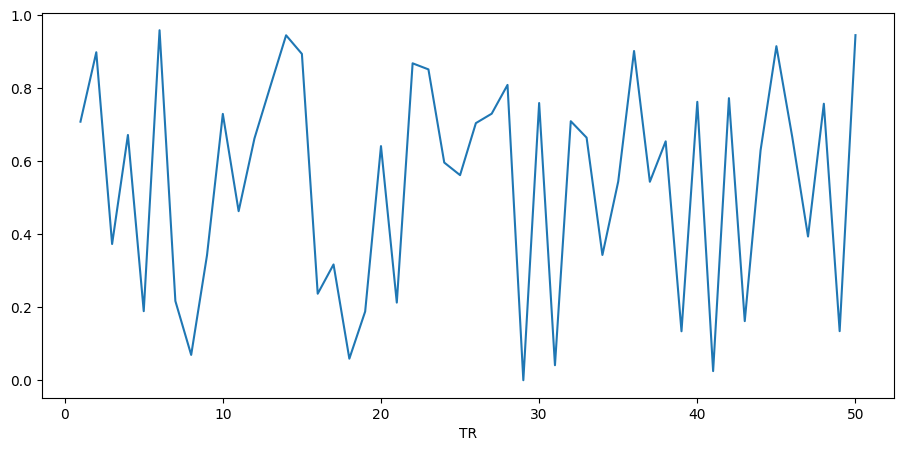

In [10]:
# Visualize Bold at node level

extractor.visualize_bold(subj_id="1",run=1, roi_indx=0)

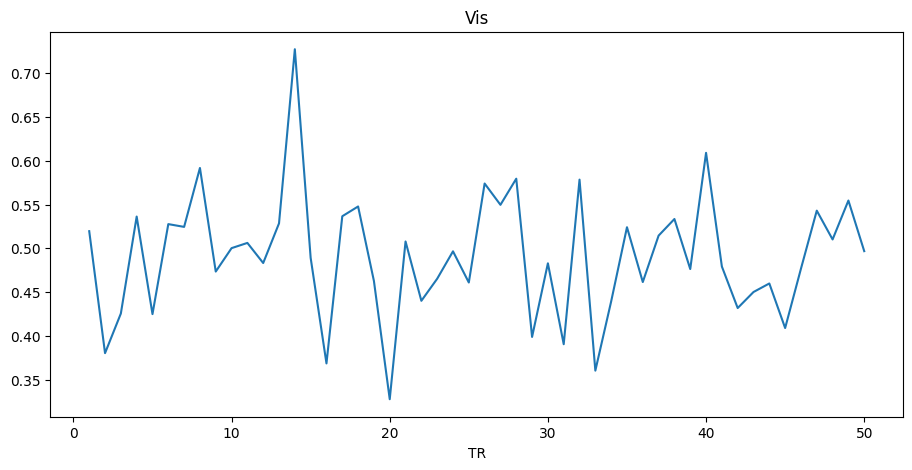

In [11]:
# Visualize Bold at network level
if ncol == 116:
    extractor.visualize_bold(subj_id="1",run=1, region="Cerebelum")
else:
    extractor.visualize_bold(subj_id="1",run=1, region="Vis")

In [12]:
# Performing Cap analysis with all subjects 

cap_analysis = CAP(parcel_approach=extractor.parcel_approach, n_clusters=3)

cap_analysis.get_caps(subject_timeseries=extractor.subject_timeseries)

In [13]:
subject_timeseries.keys()

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

Optimal cluster size for A is 9.



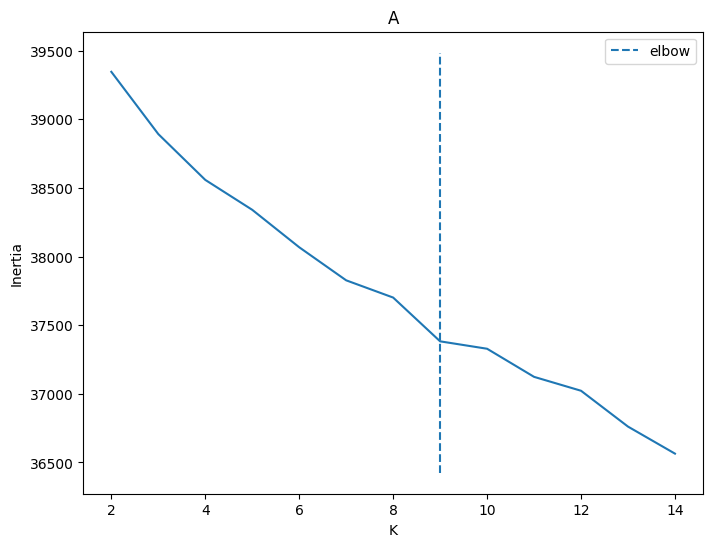

Optimal cluster size for B is 6.



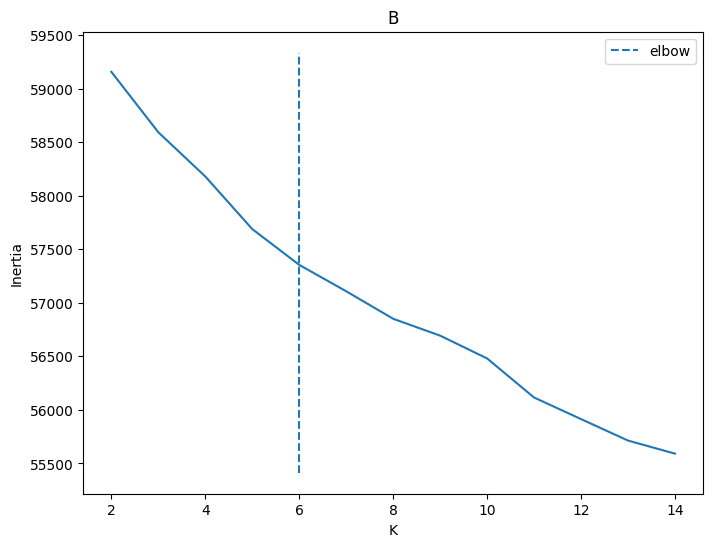

In [14]:
# Performing Cap analysis with groups, list of n_clusters, and elbow cluster selection method

cap_analysis = CAP(parcel_approach=extractor.parcel_approach, groups={"A": ["1","2","3","5"], "B": ["4","6","7","8","9","10"]}, n_clusters=list(range(2,15)), cluster_selection_method="elbow")

# When elbow method is specified, the associated plots will be shown, furthermore, the saved kmeans model for each group will automatically save to the optimal cluster size
#cap_analysis.get_caps(subject_timeseries="sample_for_neurocaps_demo_timeseries.pkl", runs=[1,2], show_figs=True, output_dir=output_dir)

cap_analysis.get_caps(subject_timeseries="sample_for_neurocaps_demo_timeseries.pkl", runs=[1,2], show_figs=True)

In [15]:
# Performing Cap analysis with groups, list of n_clusters, and silhouette cluster selection method

cap_analysis = CAP(parcel_approach=extractor.parcel_approach, groups={"A": ["1","2","3","5"], "B": ["4","6","7","8","9","10"]}, n_clusters=list(range(2,4)), cluster_selection_method="silhouette")

cap_analysis.get_caps(subject_timeseries="sample_for_neurocaps_demo_timeseries.pkl")

# kmeans model automatically save to the optimal size
cap_analysis.kmeans

Optimal cluster size for A is 2.
Optimal cluster size for B is 2.


{'A': KMeans(n_clusters=2), 'B': KMeans(n_clusters=2)}

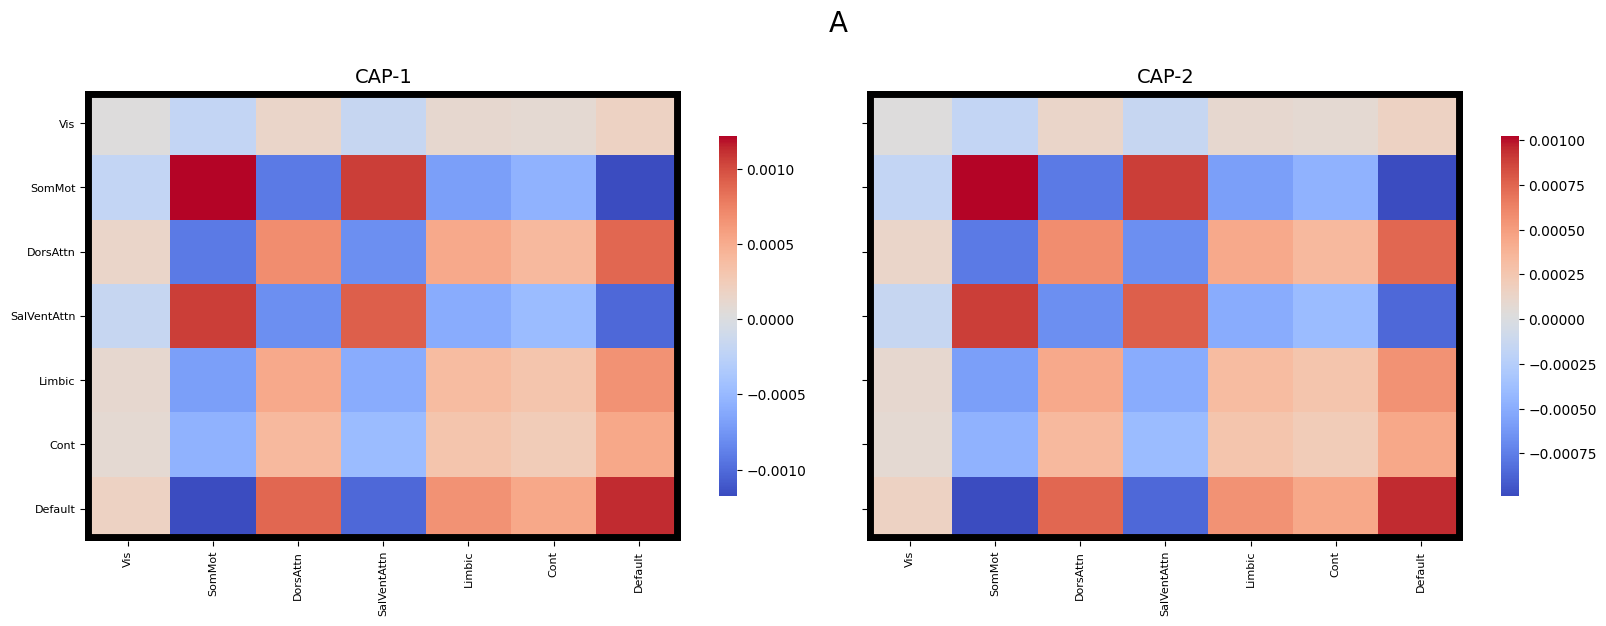

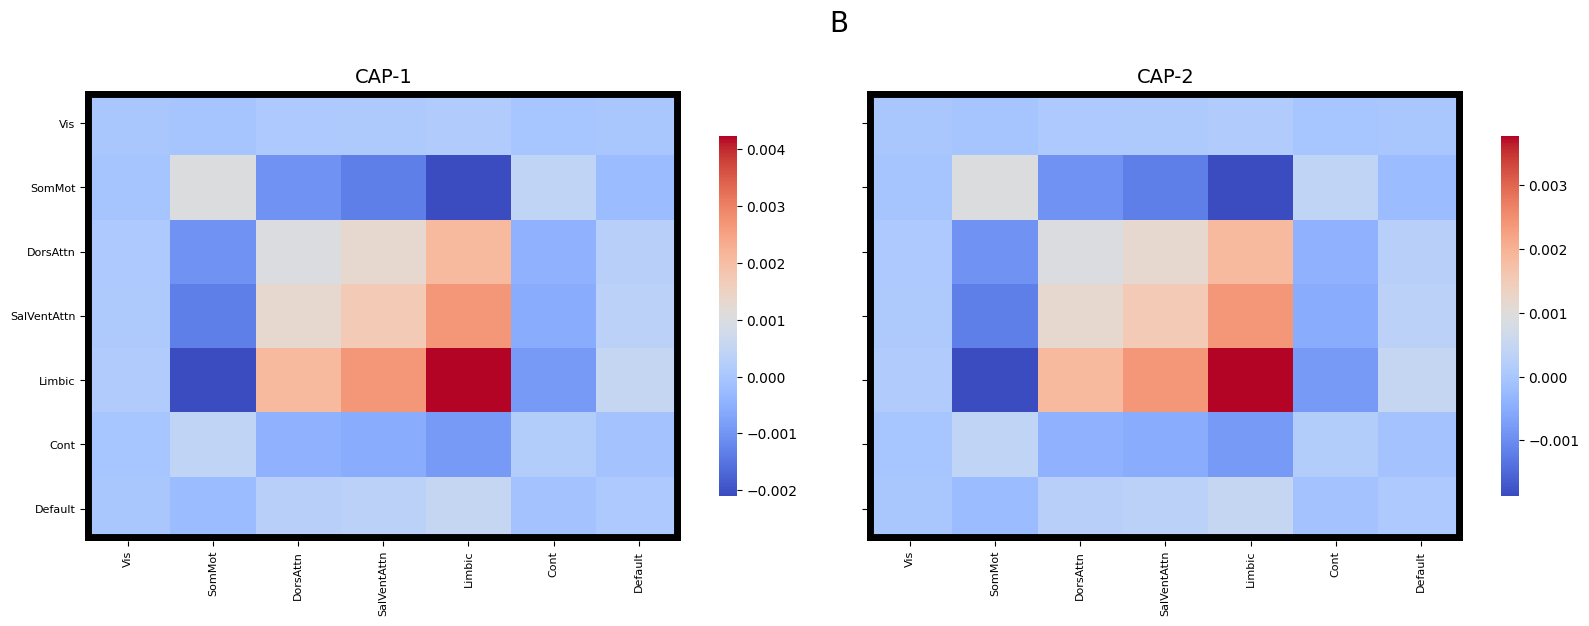

In [16]:
# Visualize Caps
#cap_analysis.caps2plot(subplots=True, xlabel_rotation=90, sharey=True, output_dir=output_dir)
cap_analysis.caps2plot(subplots=True, xlabel_rotation=90, sharey=True, borderwidths=10)

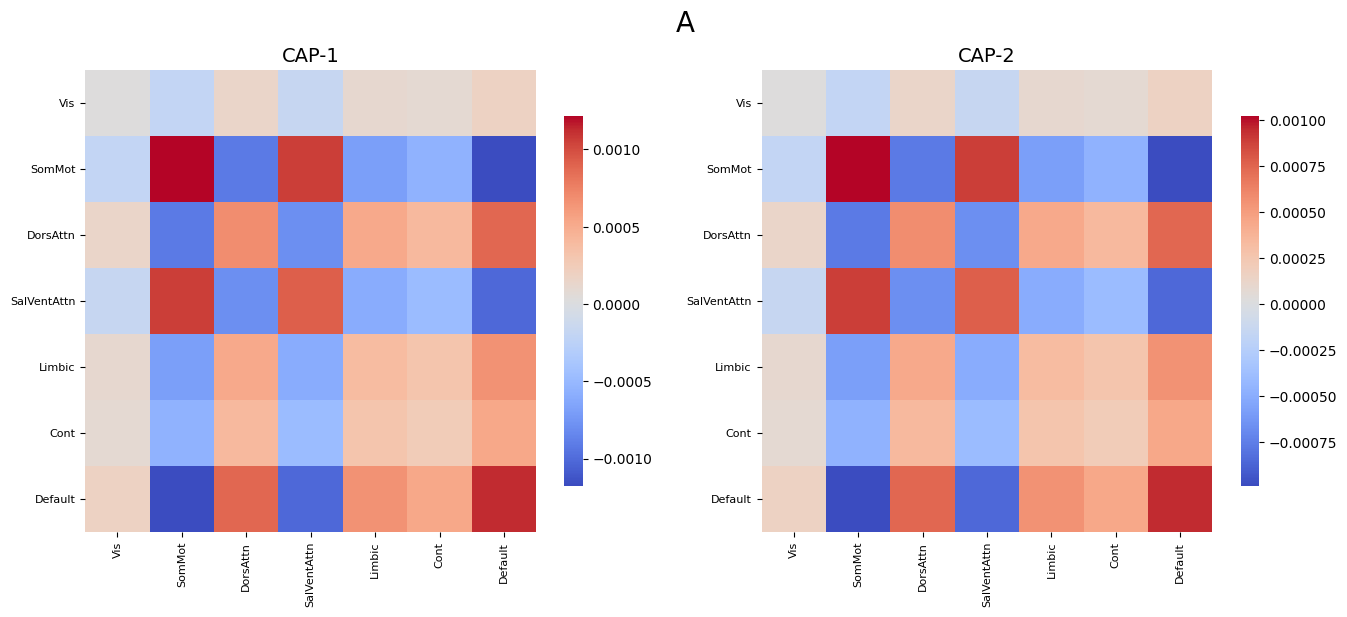

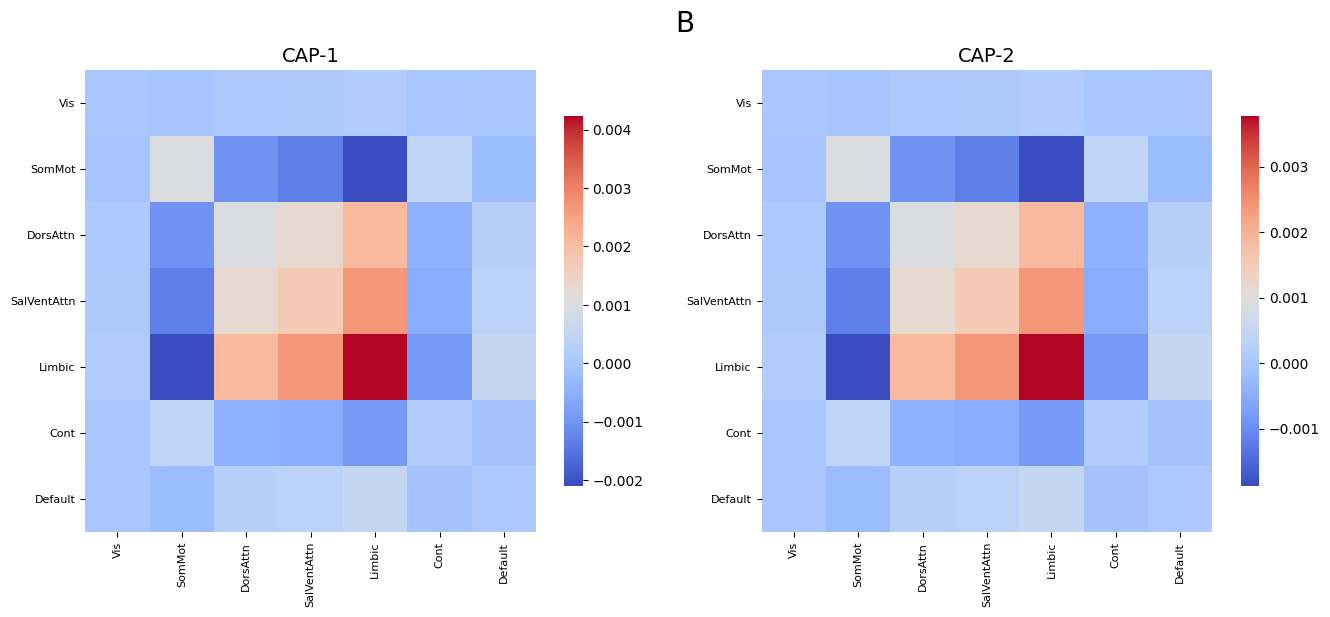

In [17]:
# Visualize Caps
cap_analysis.caps2plot(subplots=True, xlabel_rotation=90, hspace=0.6, tight_layout=False, sharey = False)

Invalid kwargs arguments used and will be ignored {'set_xlim': (-20, 120)}.


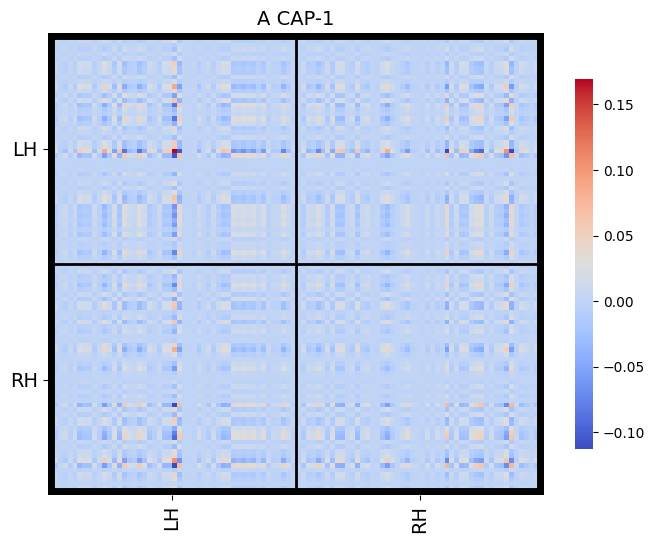

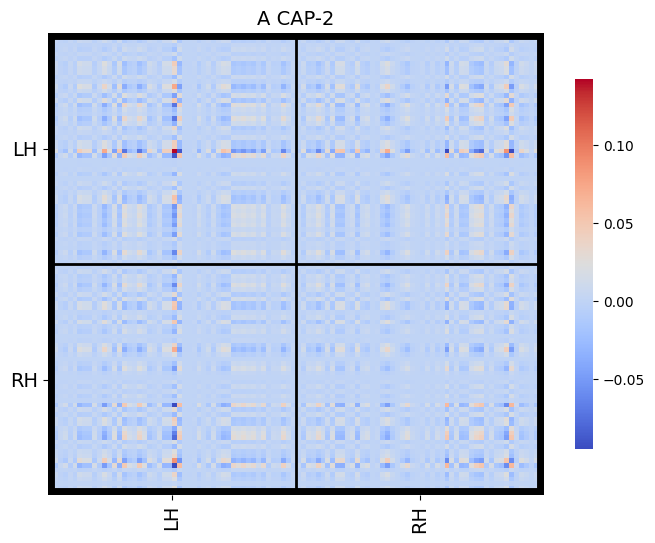

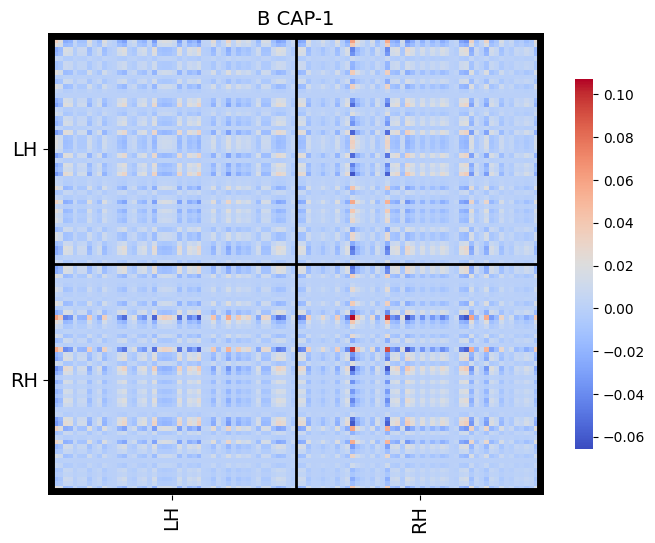

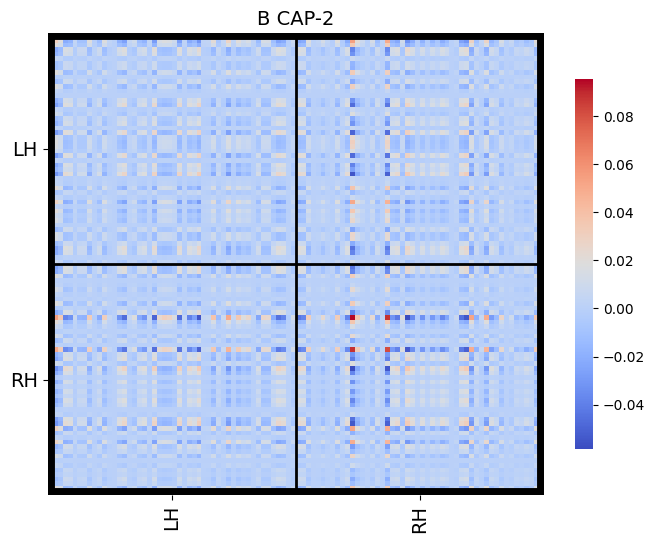

In [18]:
# Change scope from network to nodes

cap_analysis.caps2plot(subplots=False, yticklabels_size=14, wspace = 0.1, visual_scope="nodes", xlabel_rotation=90, xticklabels_size = 14, hspace = 0.6, tight_layout = False, hemisphere_labels=True, borderwidths=10, set_xlim = (-20, 120), linewidths=2)

In [19]:
cap_analysis._region_caps

{'A': {'CAP-1': array([-0.00554012,  0.03488168, -0.02618188,  0.030409  , -0.01973148,
         -0.01576989, -0.03364039]),
  'CAP-2': array([ 0.00507992, -0.03198416,  0.02400703, -0.02788301,  0.01809244,
          0.01445993,  0.03084598])},
 'B': {'CAP-1': array([-0.00206016,  0.03223545, -0.03170243, -0.04143873, -0.06507892,
          0.01395046, -0.00809571]),
  'CAP-2': array([ 0.00194447, -0.03042525,  0.02992217,  0.03911172,  0.06142438,
         -0.01316707,  0.00764109])}}

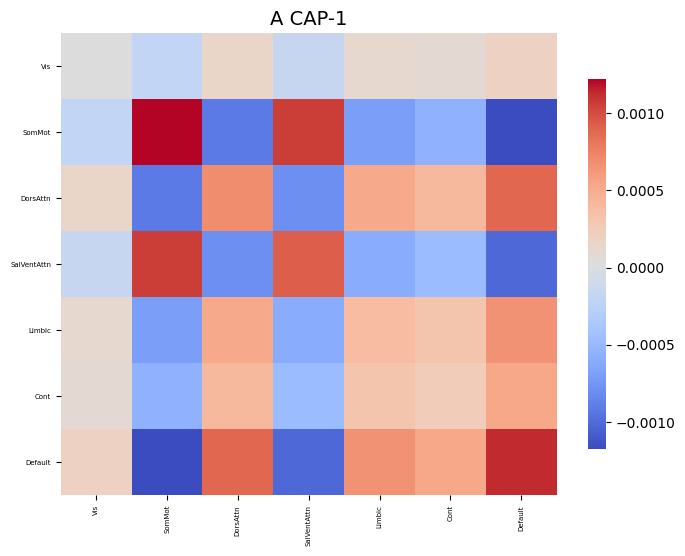

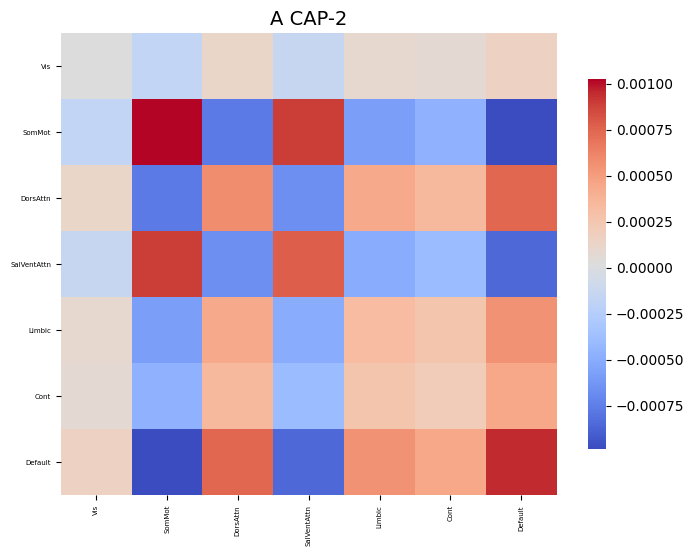

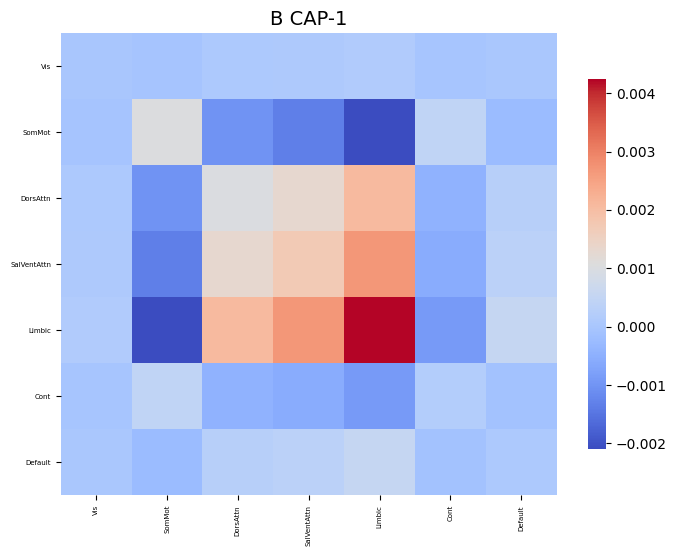

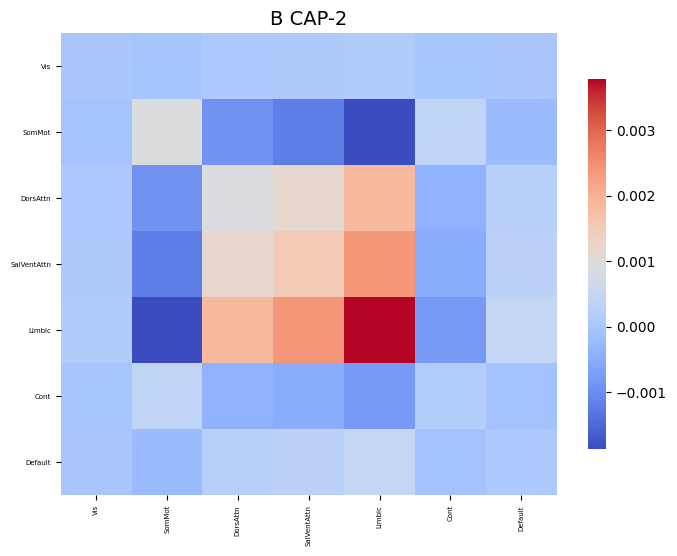

In [20]:
cap_analysis.caps2plot(subplots=False, yticklabels_size=5, wspace = 0.1, visual_scope="regions", xlabel_rotation=90, xticklabels_size = 5, hspace = 0.6, tight_layout = False)

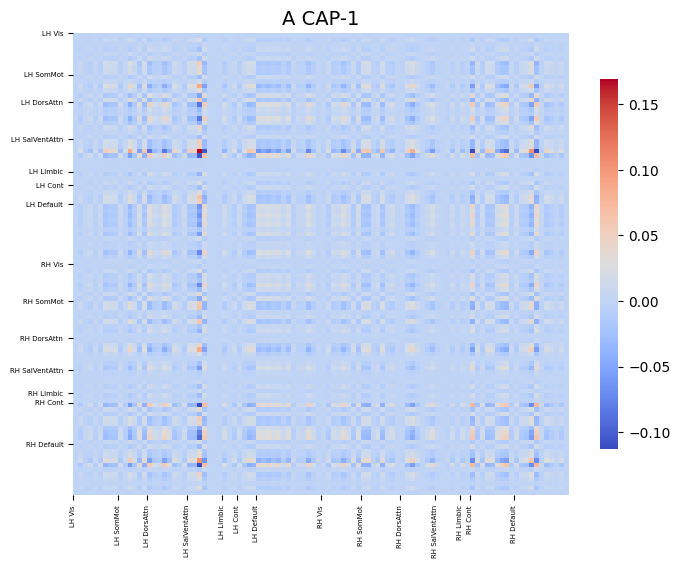

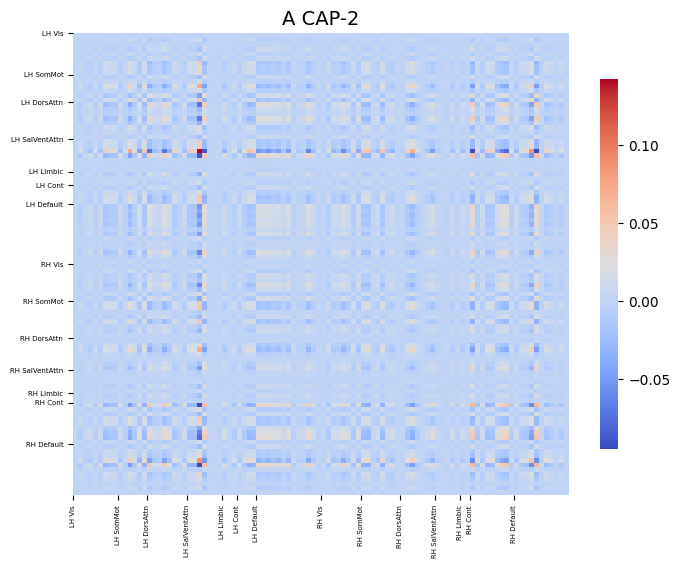

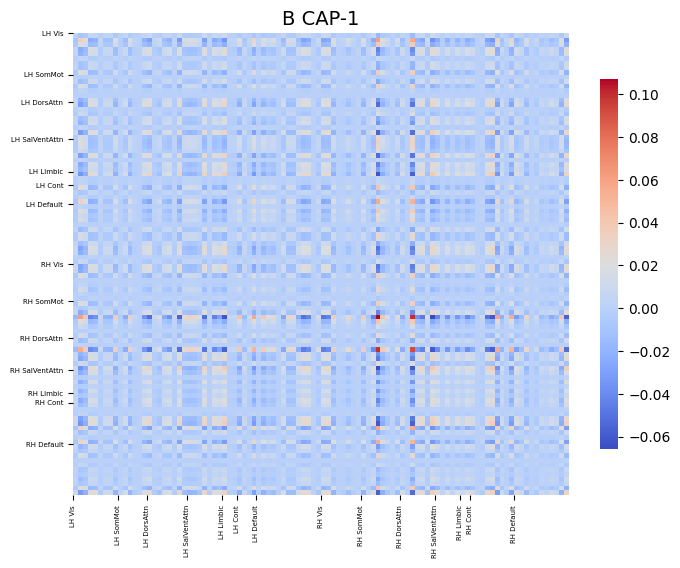

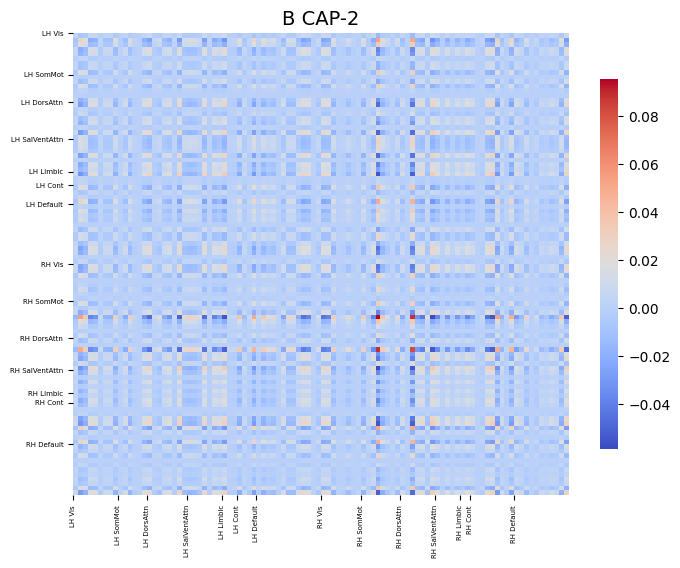

In [21]:
cap_analysis.caps2plot(subplots=False, yticklabels_size=5, wspace = 0.1, visual_scope="nodes", xlabel_rotation=90, xticklabels_size = 5, hspace = 0.6, tight_layout = False)

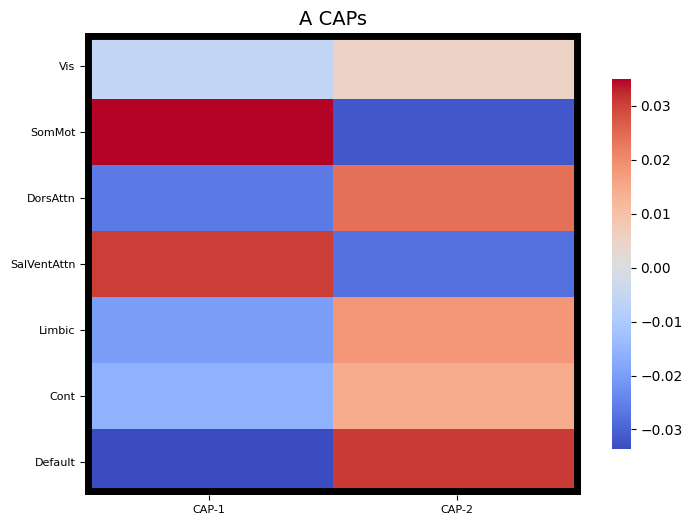

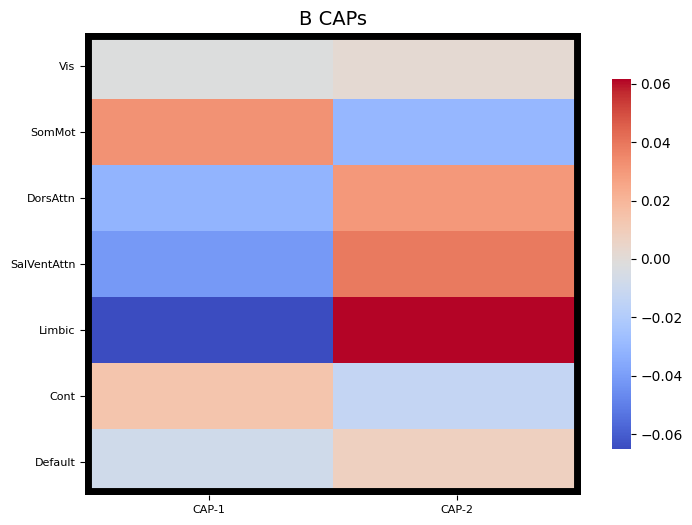

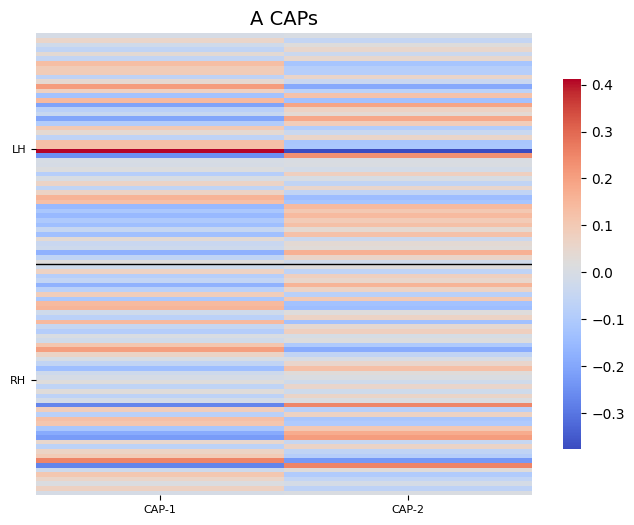

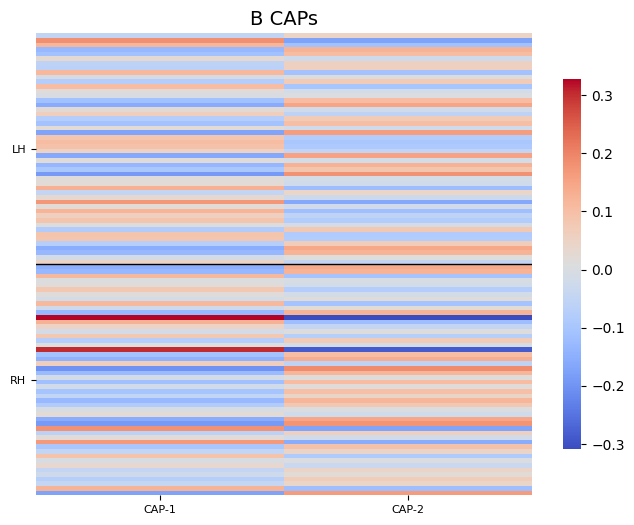

In [22]:
# Get regular heatmap 
cap_analysis.caps2plot(subplots=True, visual_scope="regions", plot_options="heatmap", borderwidths=10)
cap_analysis.caps2plot(subplots=True, visual_scope="nodes", plot_options="heatmap", hemisphere_labels = True)

In [23]:
# Calculate cap metrics
# cap_analysis.calculate_metrics(subject_timeseries=extractor.subject_timeseries,tr=2,metrics="persistence",return_df=True, output_dir=output_dir, file_name="Group_CAPs_metrics")
cap_analysis.calculate_metrics(subject_timeseries=extractor.subject_timeseries,tr=2,metrics="persistence",return_df=True)

{'persistence':    Subject_ID Group    Run     CAP-1     CAP-2
 0           1     A  run-1  3.636364  5.454545
 1           1     A  run-2  3.818182  5.272727
 2           1     A  run-3  4.461538  3.500000
 3           2     A  run-1  3.538462  4.153846
 4           2     A  run-2  5.200000  5.333333
 5           2     A  run-3  3.857143  3.538462
 6           3     A  run-1  3.846154  3.571429
 7           3     A  run-2  3.428571  3.714286
 8           3     A  run-3  4.500000  3.833333
 9           5     A  run-1  3.636364  5.000000
 10          5     A  run-2  2.615385  5.076923
 11          5     A  run-3  4.000000  3.384615
 12          4     B  run-1  3.538462  3.857143
 13          4     B  run-2  3.200000  3.714286
 14          4     B  run-3  5.166667  3.166667
 15          6     B  run-1  3.230769  4.142857
 16          6     B  run-2  3.333333  3.333333
 17          6     B  run-3  3.428571  4.000000
 18          7     B  run-1  3.076923  5.000000
 19          7     B  run

Invalid kwargs arguments used and will be ignored {'y': -3}.


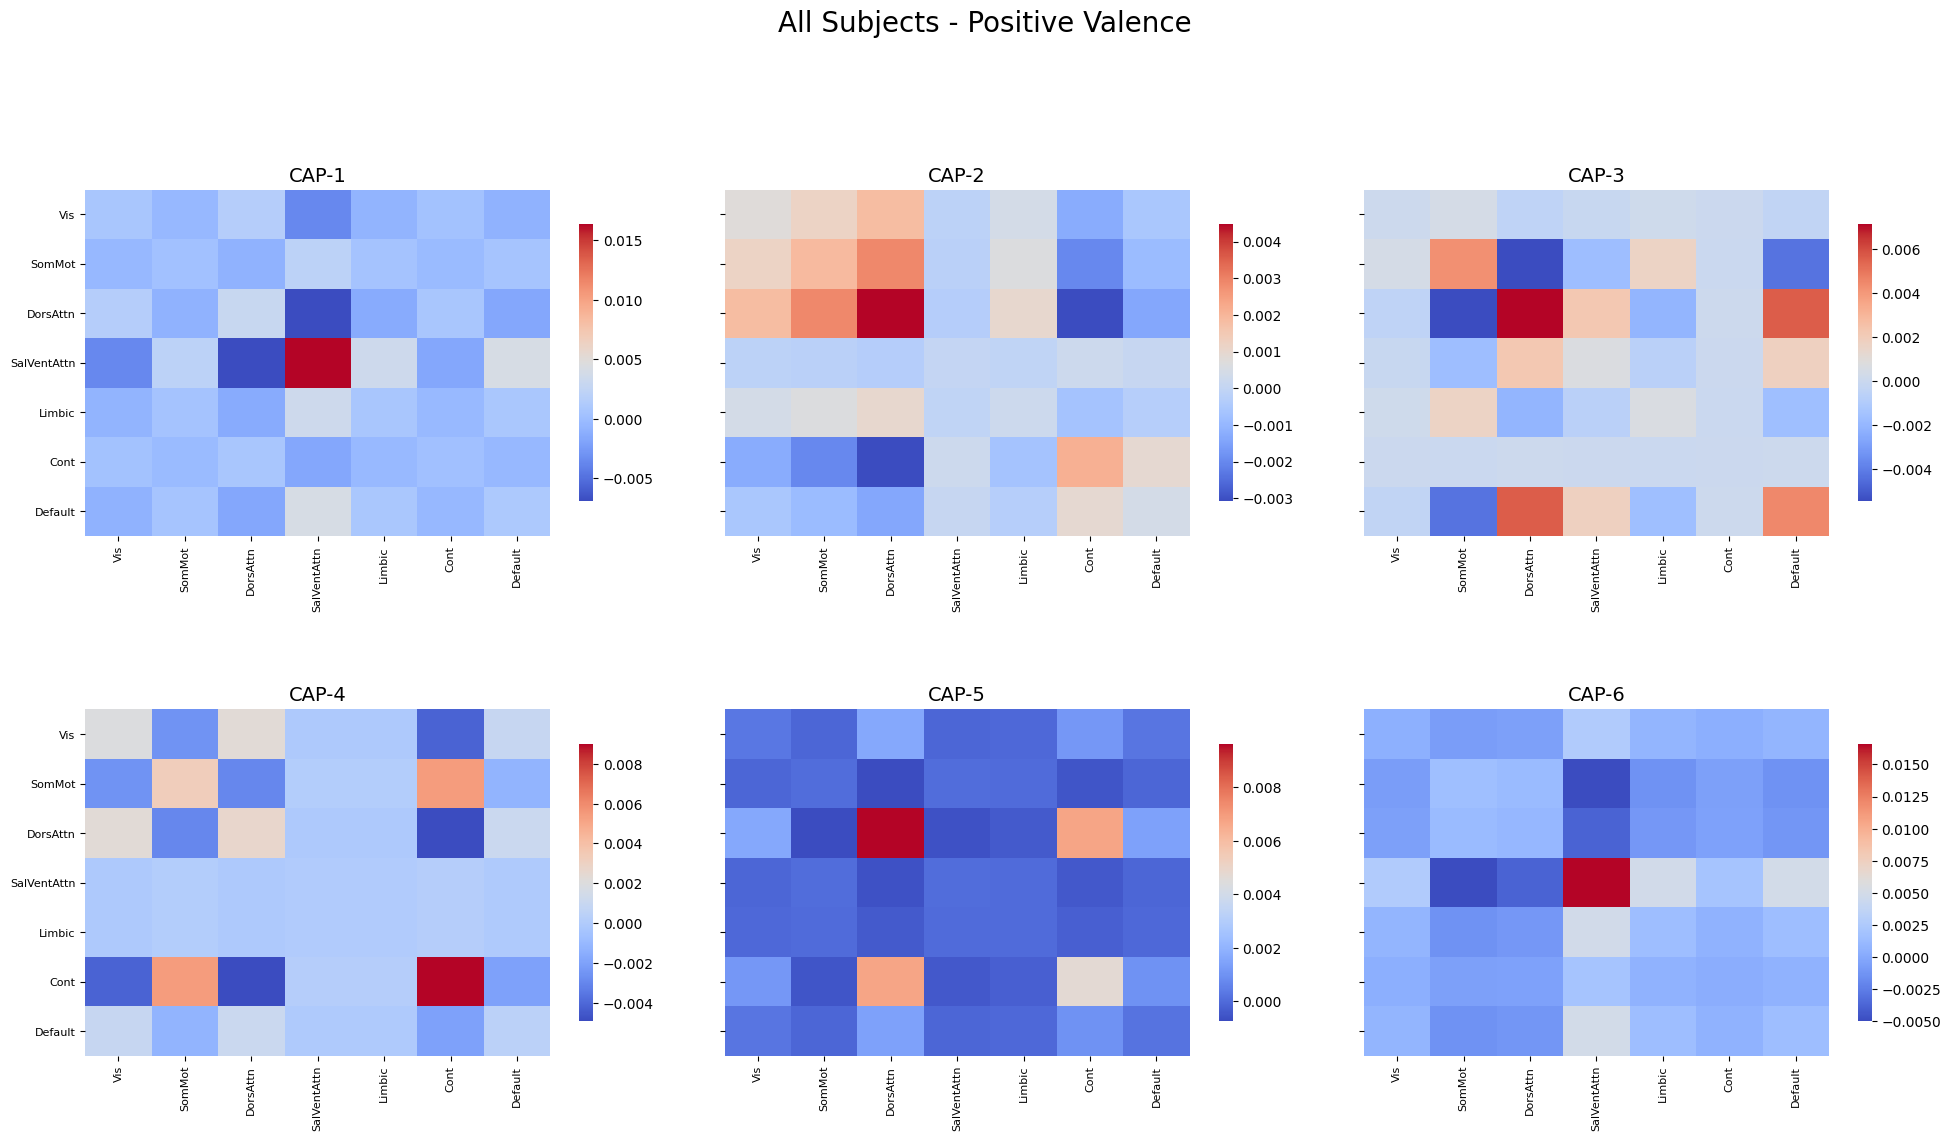

In [24]:
# Performing Cap analysis without groups or cluster selection method

cap_analysis = CAP(parcel_approach=extractor.parcel_approach, n_clusters=6)
cap_analysis.get_caps(subject_timeseries="sample_for_neurocaps_demo_timeseries.pkl")

# Invalid plotting keywords will be ignored and plotting will continue
cap_analysis.caps2plot(subplots=True, wspace = 0.1, hspace = 0.5, ncol=3, suffix_title="- Positive Valence", y = -3, xlabel_rotation=90, tight_layout=False, yticklabels_size=8, xticklabels_size=8)

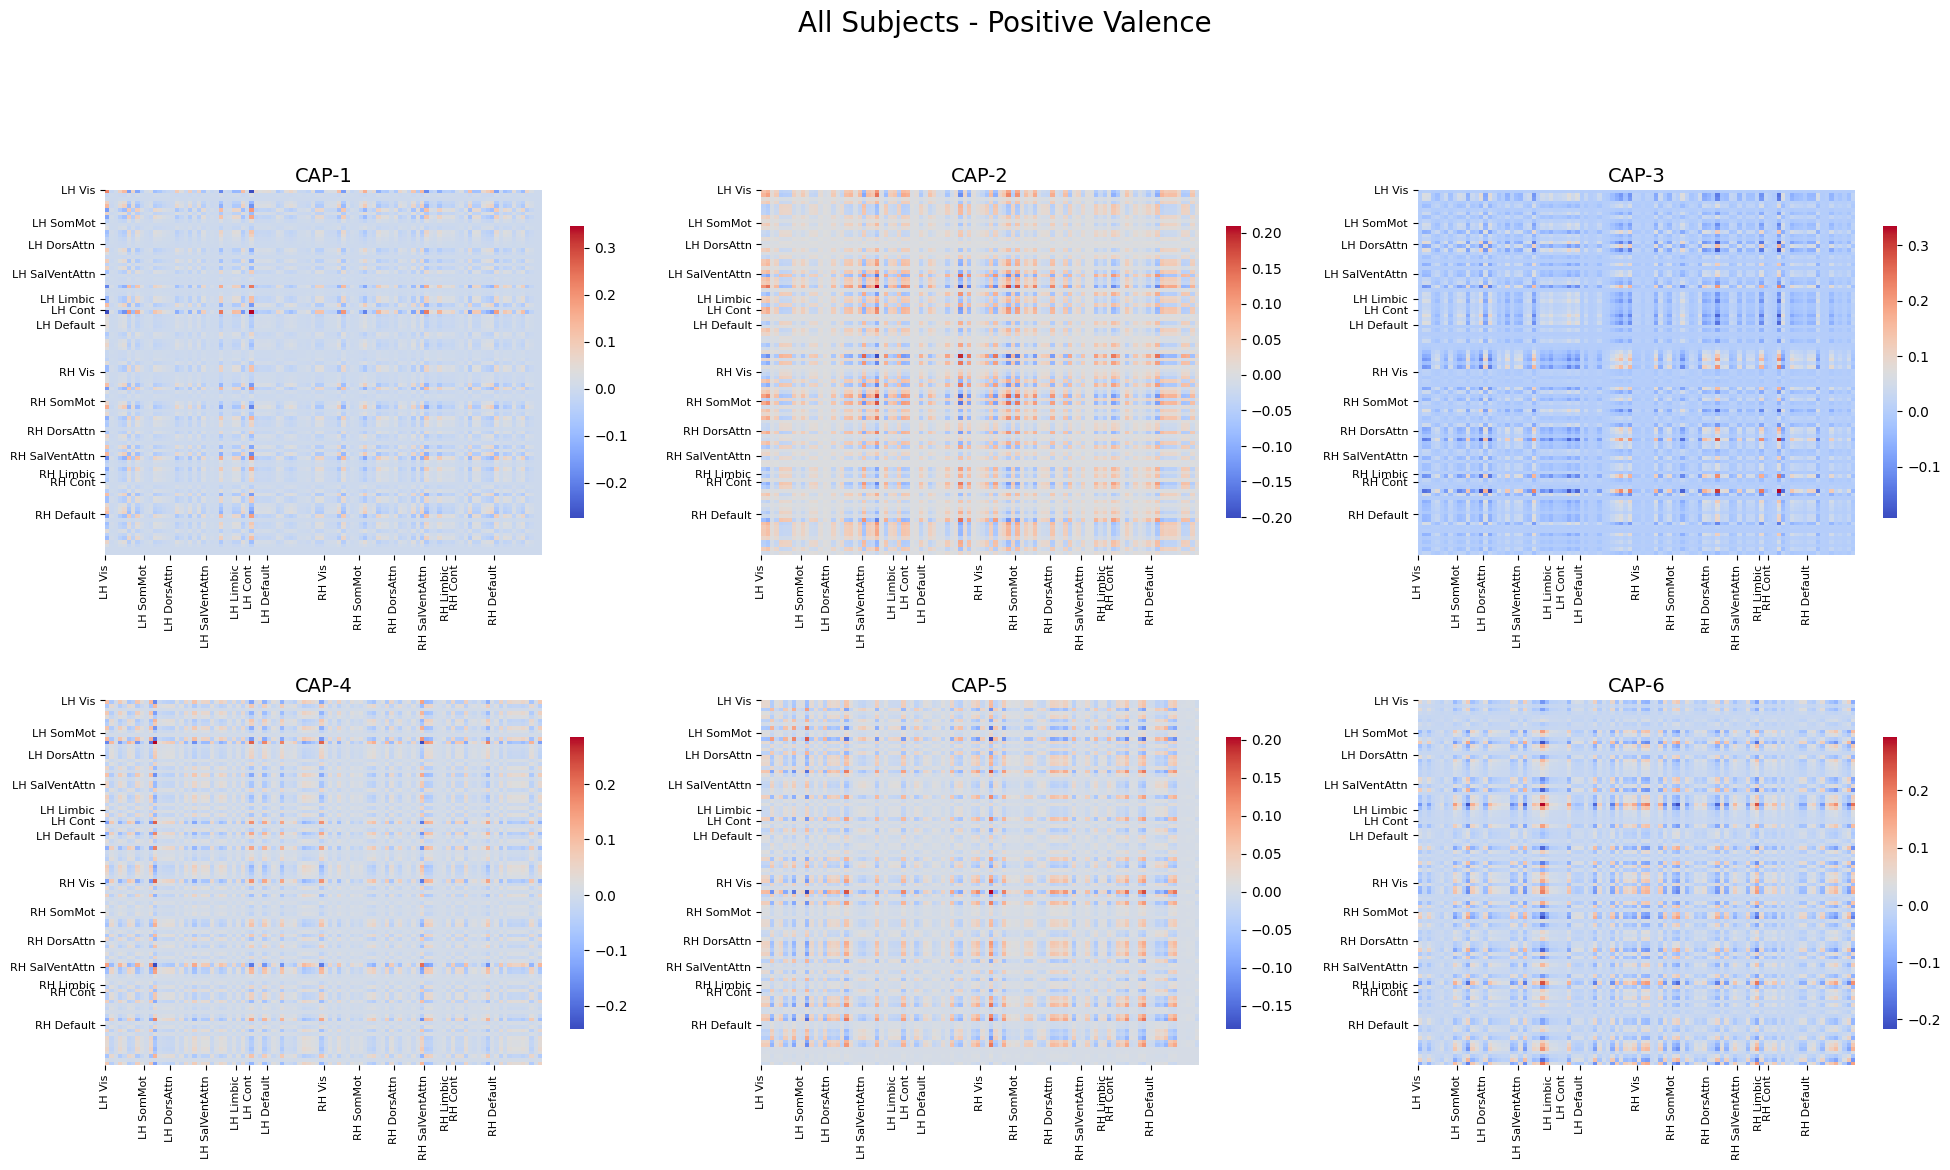

In [25]:
cap_analysis.caps2plot(visual_scope="nodes", plot_options="outer product", suffix_title="- Positive Valence", ncol=3, sharey=False, subplots=True, xlabel_rotation = 90, tight_layout=False, hspace = 0.4)

In [26]:
# Individual plots. In the event you wnat to merge TRs from two dictionaries conatining the same subject to find common CAPs across a task
subject_timeseries_1 = {str(x) : {f"run-{y}": np.random.rand(100,ncol) for y in range(1,4)} for x in range(1,11)}
subject_timeseries_2 = {str(x) : {f"run-{y}": np.random.rand(100,ncol) for y in range(1,4)} for x in range(1,7)}
# Includes `output_dir` and `file_name` parameters to save merge dictionary as a pickle file

# Returns combined dictionary as well as the reduced subject dictionaries containing only the subjects present in the combined
all_dicts = merge_dicts(subject_timeseries_list=[subject_timeseries_1, subject_timeseries_2], return_combined_dict=True, return_reduced_dicts=True)
# Only the combined subject dictionary
subject_timeseries_combined = merge_dicts(subject_timeseries_list=[subject_timeseries_1, subject_timeseries_2], return_combined_dict=True, return_reduced_dicts=False)

print(all_dicts["dict_0"].keys())
print(all_dicts["dict_1"].keys())
print(all_dicts["combined"].keys())

dict_keys(['1', '2', '3', '4', '5', '6'])
dict_keys(['1', '2', '3', '4', '5', '6'])
dict_keys(['1', '2', '3', '4', '5', '6'])


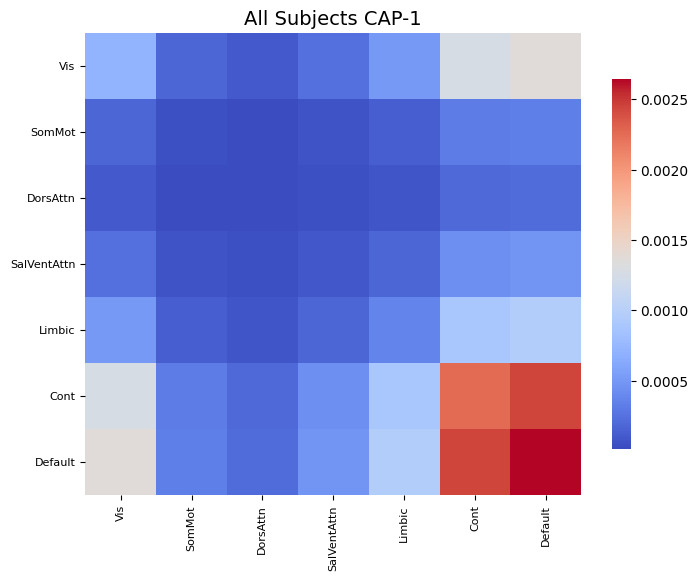

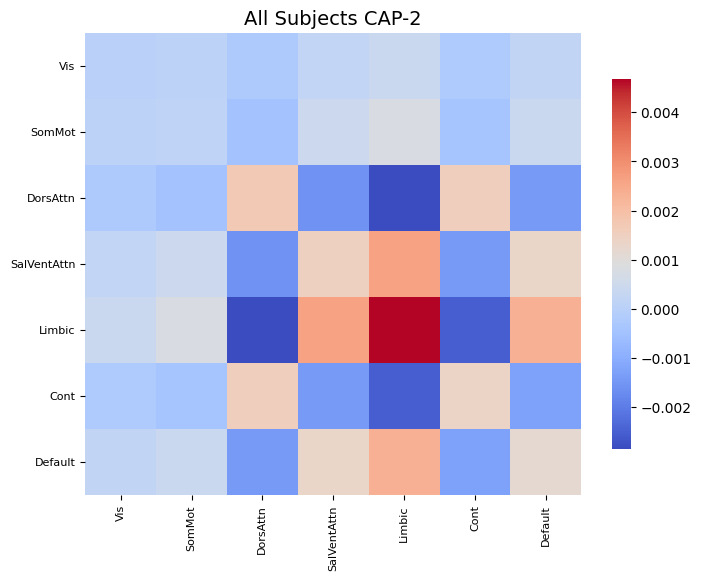

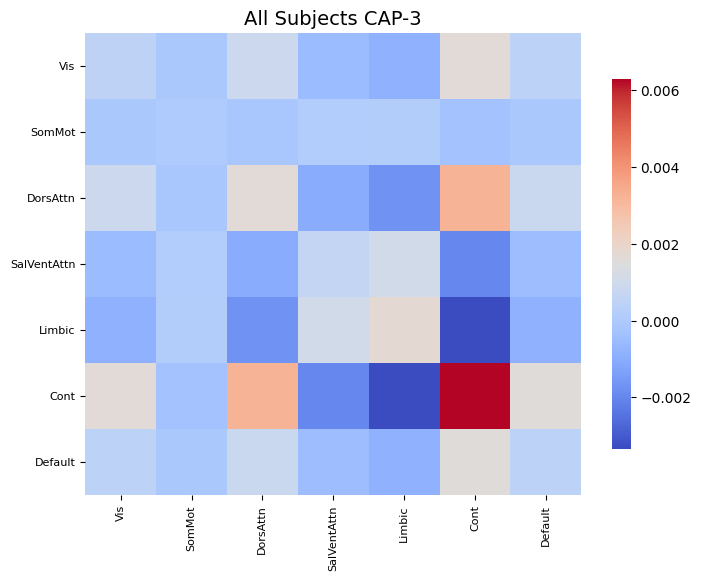

In [27]:
cap_analysis = CAP(parcel_approach=extractor.parcel_approach, n_clusters=3)
cap_analysis.get_caps(subject_timeseries=subject_timeseries_combined)
cap_analysis.caps2plot(xlabel_rotation=90)

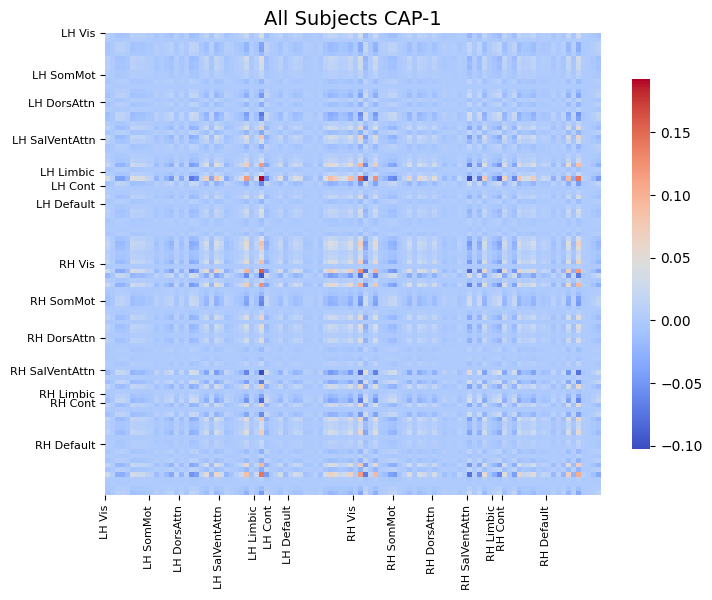

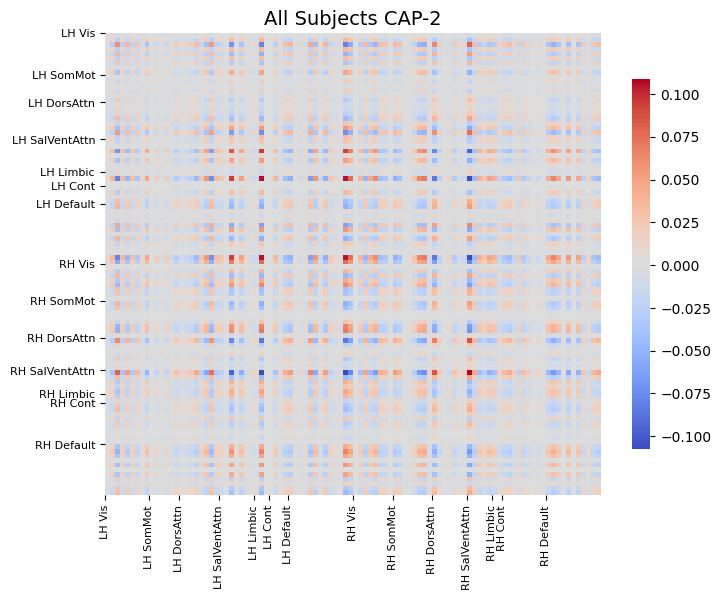

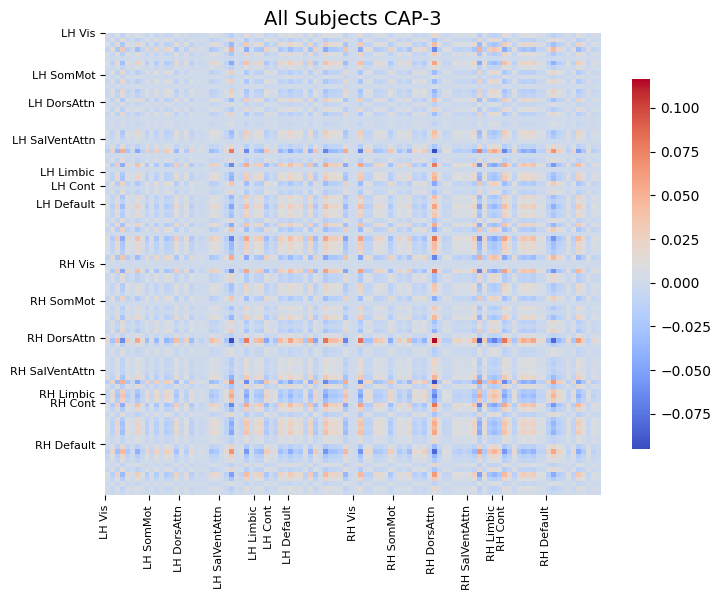

In [28]:
cap_analysis.caps2plot(visual_scope="nodes", plot_options="outer product", xlabel_rotation = 90)

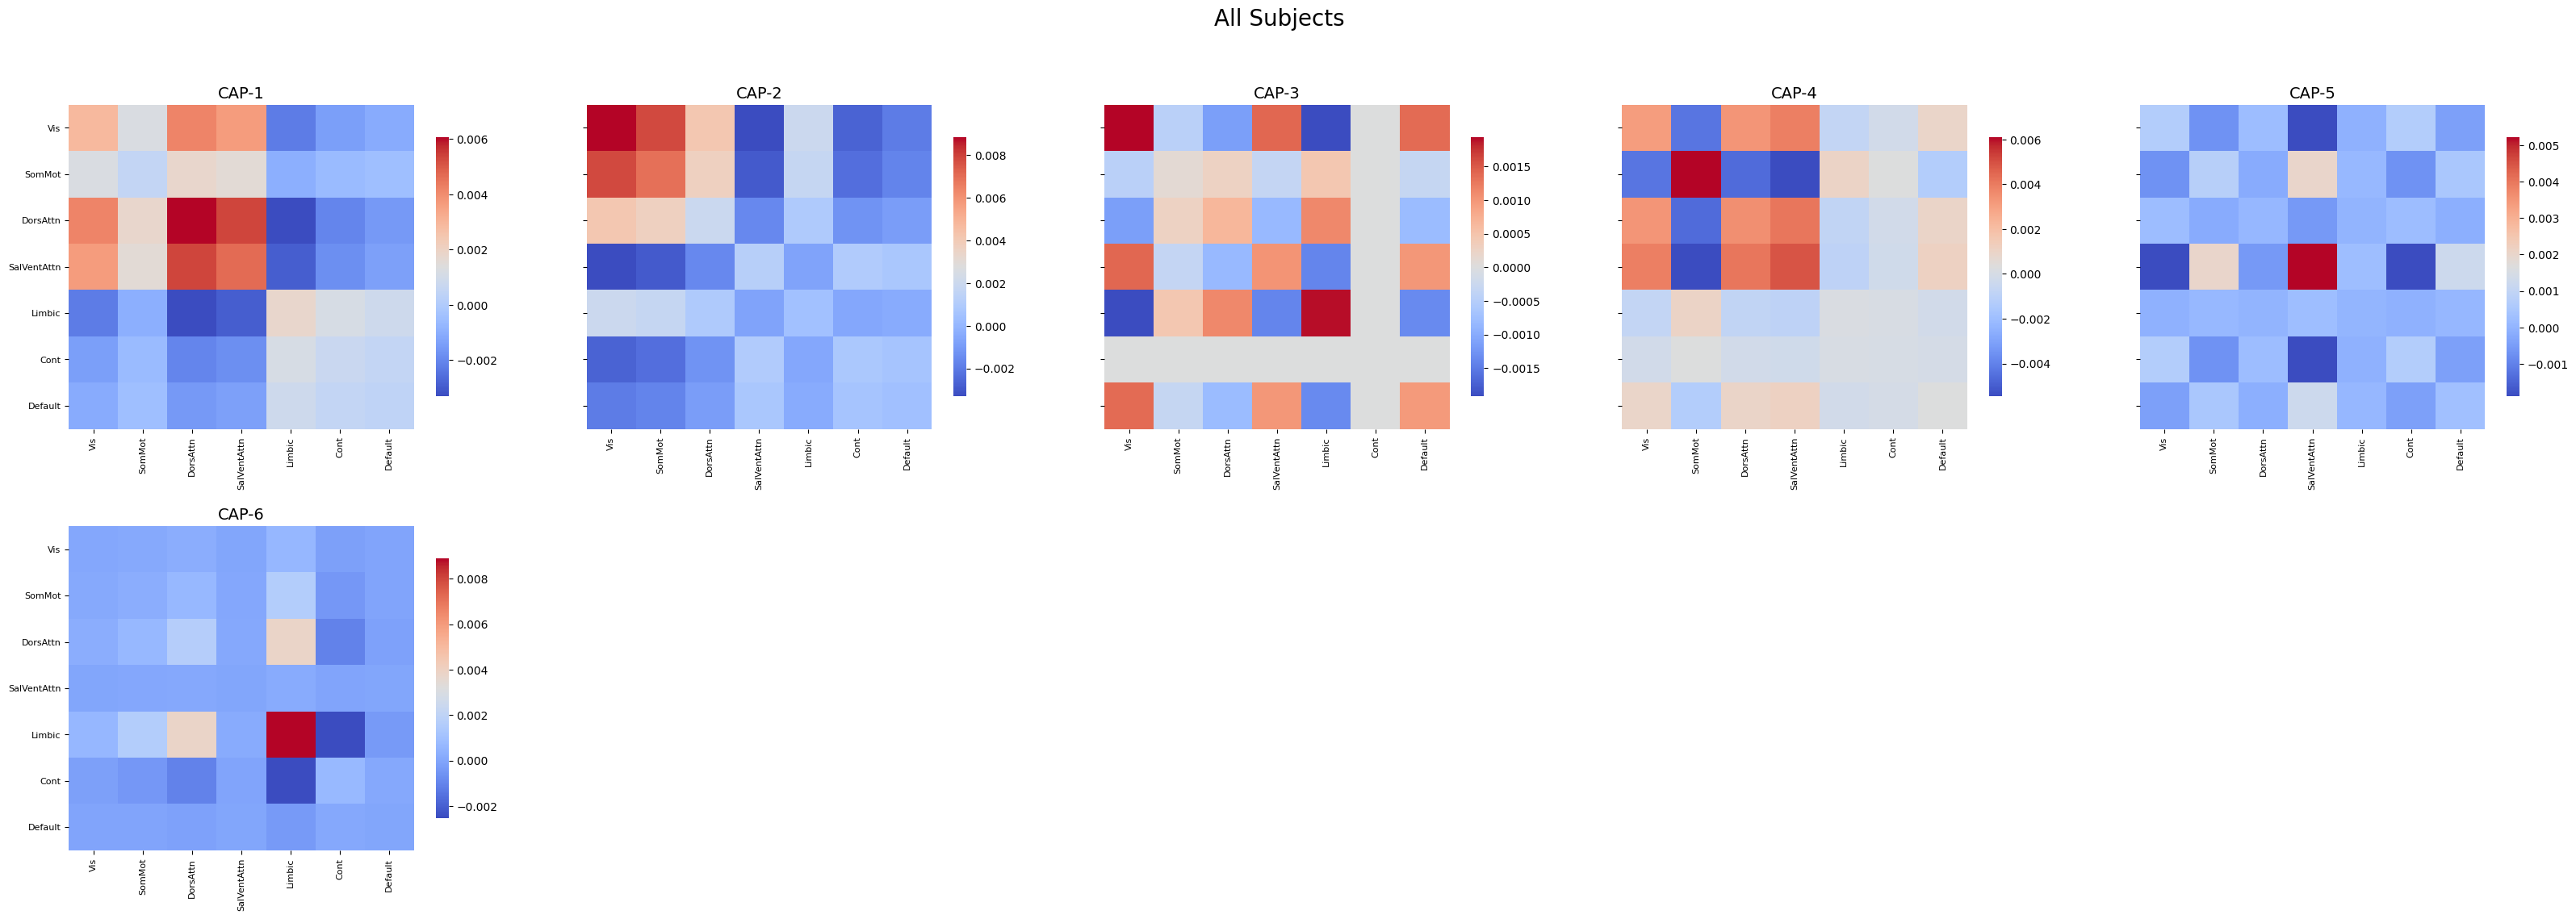

In [29]:
# Performing Caps analysis with no groups and no cluster selection method
cap_analysis = CAP(parcel_approach=extractor.parcel_approach, n_clusters=6)
cap_analysis.get_caps(subject_timeseries=extractor.subject_timeseries)
cap_analysis.caps2plot(visual_scope="regions", plot_options="outer product", subplots=True, fontsize=14, xlabel_rotation=90, tight_layout=False, hspace=0.3)

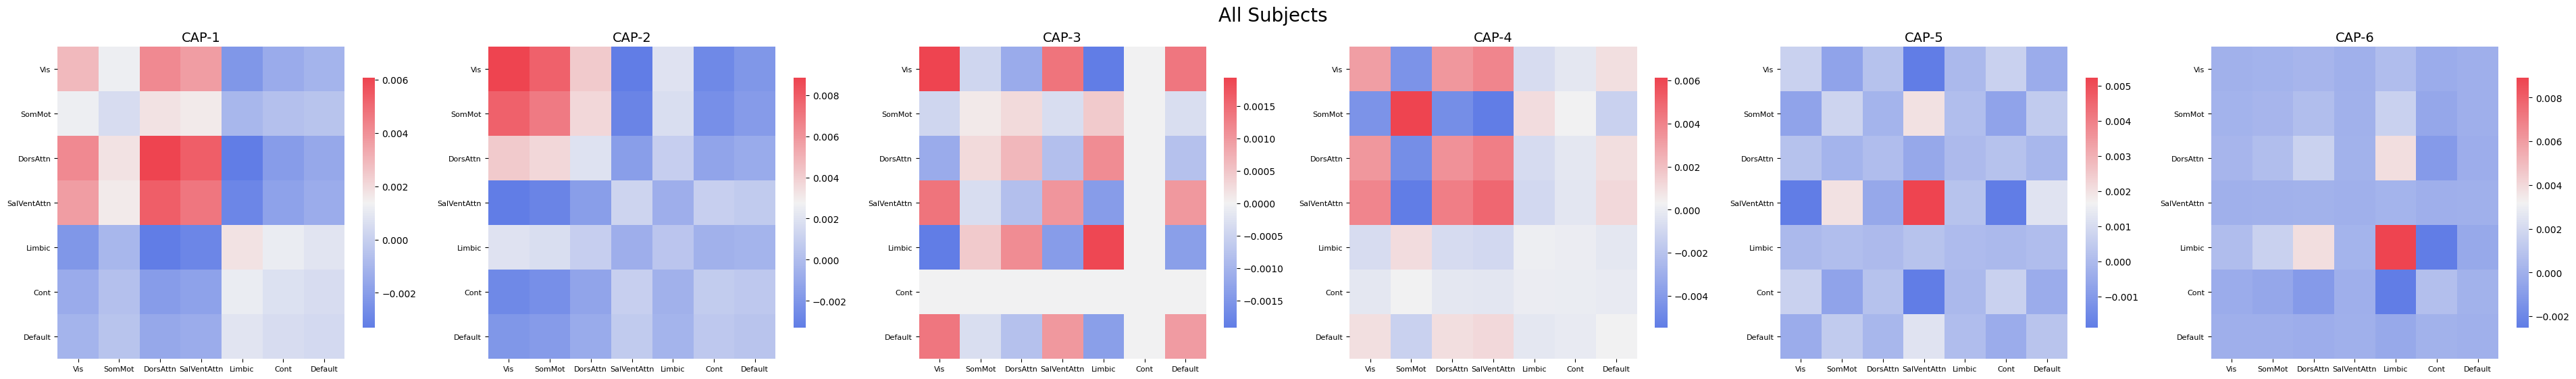

In [30]:
# Can change the number of columns for subplots. If none is specified, the default varies but will max out to five columns; however, you can specify more than five columns
#cap_analysis.caps2plot(output_dir=output_dir, visual_scope="regions", plot_options="outer product", subplots=True, fontsize=14, ncol=3, xlabel_rotation=90, tight_layout=False,  hspace = 0.3)
import seaborn as sns

sns.diverging_palette(145, 300, s=60, as_cmap=True)
palette = sns.diverging_palette(260, 10, s=80, l=55, n=256, as_cmap=True)
cap_analysis.caps2plot(visual_scope="regions", plot_options="outer product", subplots=True, fontsize=14, ncol=6, sharey=False, tight_layout=False, xlabel_rotation=0, hspace = 0.3, cmap=palette)

In [31]:
help(cap_analysis.caps2plot)

Help on method caps2plot in module neurocaps.analysis.cap:

caps2plot(output_dir: Union[str, os.PathLike, NoneType] = None, suffix_title: Optional[str] = None, plot_options: Union[str, List[str]] = 'outer product', visual_scope: List[str] = 'regions', show_figs: bool = True, subplots: bool = False, **kwargs) -> None method of neurocaps.analysis.cap.CAP instance
        **Generate heatmaps and outer product plots of CAPs**
    
        This function produces seaborn heatmaps for each CAP. If groups were given when the CAP class was initialized, plotting will be done for all CAPs for all groups.
    
        Parameters
        ----------
            output_dir : Path or None, default=None
                Directory to save plots to. The directory will be created if it does not exist. If None, plots will not be saved.
            suffix_title : str or None, default=None
                Appended to the title of each plot as well as the name of the saved file if ``output_dir`` is provided.
 

In [32]:
#output = cap_analysis.calculate_metrics(subject_timeseries=extractor.subject_timeseries,return_df=True,output_dir=output_dir, runs=[1,2],file_name="All_Subjects_CAPs_metrics")
output = cap_analysis.calculate_metrics(subject_timeseries=extractor.subject_timeseries,return_df=True, runs=[1,2])
output["temporal fraction"]

,Subject_ID,Group,Run,CAP-1,CAP-2,CAP-3,CAP-4,CAP-5,CAP-6
0,1,All Subjects,run-1,0.16,0.12,0.22,0.24,0.16,0.10
1,1,All Subjects,run-2,0.14,0.08,0.22,0.20,0.20,0.16
2,2,All Subjects,run-1,0.14,0.16,0.24,0.18,0.10,0.18
3,2,All Subjects,run-2,0.20,0.22,0.14,0.16,0.10,0.18
4,3,All Subjects,run-1,0.12,0.18,0.16,0.20,0.18,0.16
5,3,All Subjects,run-2,0.16,0.18,0.22,0.16,0.12,0.16
6,4,All Subjects,run-1,0.20,0.16,0.16,0.14,0.26,0.08
7,4,All Subjects,run-2,0.18,0.16,0.20,0.14,0.18,0.14
8,5,All Subjects,run-1,0.24,0.14,0.20,0.18,0.04,0.20
9,5,All Subjects,run-2,0.20,0.10,0.12,0.16,0.16,0.26


In [33]:
#output = cap_analysis.calculate_metrics(subject_timeseries=extractor.subject_timeseries,return_df=True, output_dir=output_dir, runs=[1,2], continuous_runs=True, file_name="All_Subjects_CAPs_metrics")
cap_analysis.calculate_metrics(subject_timeseries=extractor.subject_timeseries,return_df=True, runs=[1,2], continuous_runs=True)
output["temporal fraction"]

,Subject_ID,Group,Run,CAP-1,CAP-2,CAP-3,CAP-4,CAP-5,CAP-6
0,1,All Subjects,run-1,0.16,0.12,0.22,0.24,0.16,0.10
1,1,All Subjects,run-2,0.14,0.08,0.22,0.20,0.20,0.16
2,2,All Subjects,run-1,0.14,0.16,0.24,0.18,0.10,0.18
3,2,All Subjects,run-2,0.20,0.22,0.14,0.16,0.10,0.18
4,3,All Subjects,run-1,0.12,0.18,0.16,0.20,0.18,0.16
5,3,All Subjects,run-2,0.16,0.18,0.22,0.16,0.12,0.16
6,4,All Subjects,run-1,0.20,0.16,0.16,0.14,0.26,0.08
7,4,All Subjects,run-2,0.18,0.16,0.20,0.14,0.18,0.14
8,5,All Subjects,run-1,0.24,0.14,0.20,0.18,0.04,0.20
9,5,All Subjects,run-2,0.20,0.10,0.12,0.16,0.16,0.26


In [34]:
help(cap_analysis.calculate_metrics)

Help on method calculate_metrics in module neurocaps.analysis.cap:

calculate_metrics(subject_timeseries: Union[Dict[str, Dict[str, numpy.ndarray]], str], tr: Optional[float] = None, runs: Optional[int] = None, continuous_runs: bool = False, metrics: Union[str, List[str]] = ['temporal fraction', 'persistence', 'counts', 'transition frequency'], return_df: bool = True, output_dir: Union[str, os.PathLike, NoneType] = None, file_name: Optional[str] = None) -> Dict method of neurocaps.analysis.cap.CAP instance
    **Get CAPs metrics**
    
    Creates a single pandas DataFrame containing CAP metrics for all participants, as described in Liu et al., 2018 and Yang et al., 2021. 
    The metrics include:
    
     - 'temporal fraction' : The proportion of total volumes spent in a single CAP over all volumes in a run.
     - 'persistence : The average time spent in a single CAP before transitioning to another CAP (average consecutive/uninterrupted time).
     - 'counts' : The frequency of each

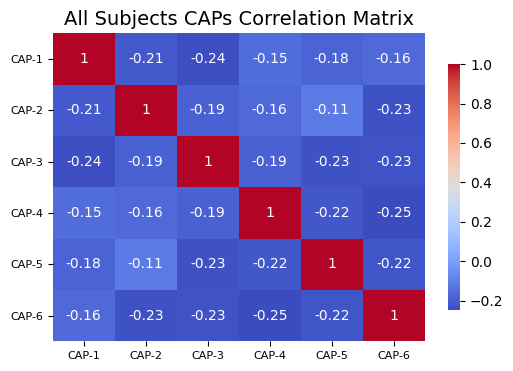

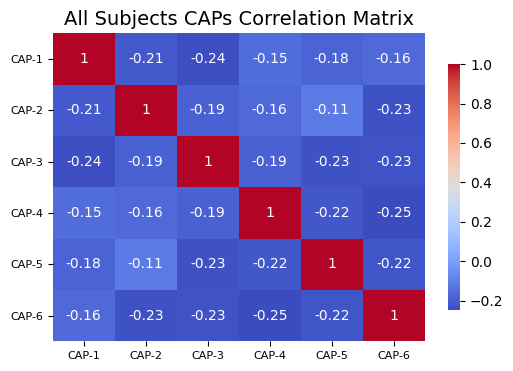

In [35]:
#cap_analysis.caps2corr(annot=True, output_dir=output_dir)
cap_analysis.caps2corr(annot=True ,figsize=(6,4))

import seaborn as sns
palette = sns.diverging_palette(260, 10, s=80, l=55, n=256, as_cmap=True)
cap_analysis.caps2corr(annot=True ,figsize=(6,4))

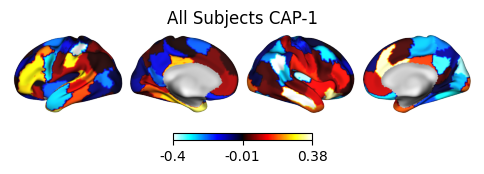

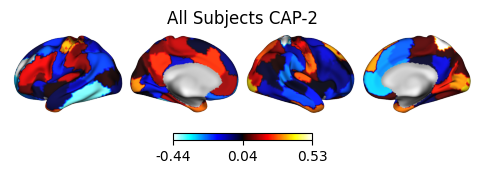

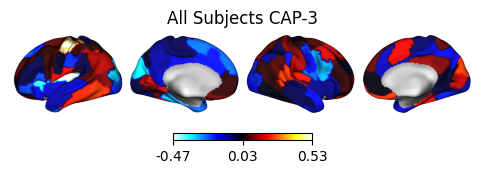

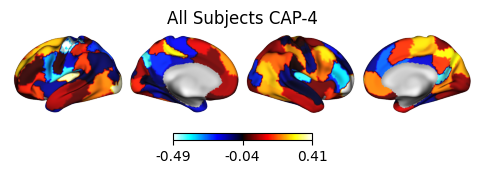

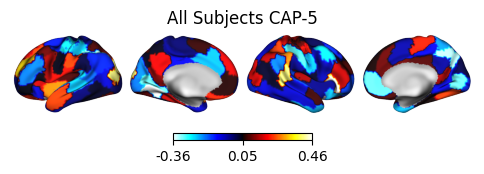

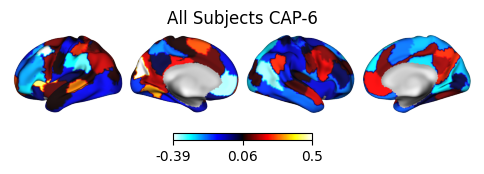

In [36]:
# If you experience coverage issues, usually smoothing helps to mitigate these issues

#cap_analysis.caps2surf(fwhm=1, output_dir=output_dir,save_stat_map=True)

cap_analysis.caps2surf(cmap="cold_hot", layout="row",  size=(500, 100))

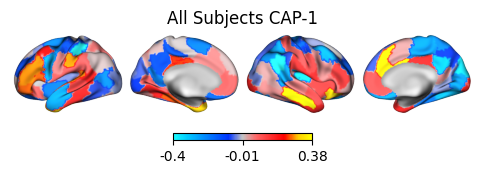

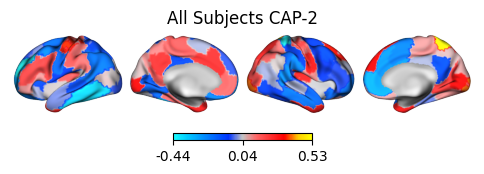

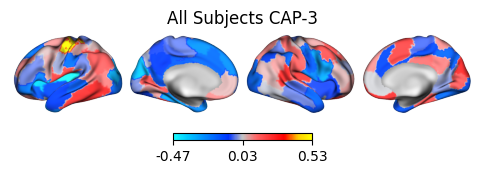

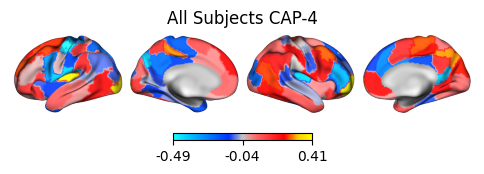

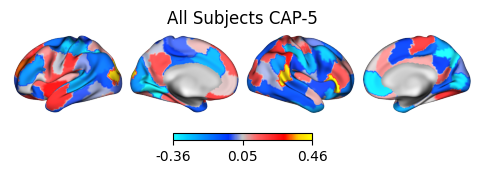

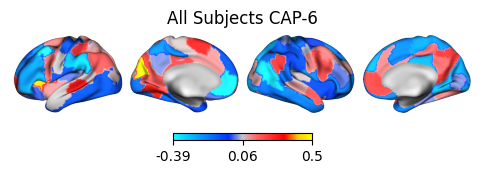

In [37]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#1bfffe", "#00ccff", "#0099ff", "#0066ff", "#0033ff", "#c4c4c4", "#ff6666", 
          "#ff3333", "#FF0000","#ffcc00","#FFFF00"]

# Create the colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cold_hot", colors, N=256)
cap_analysis.caps2surf(cmap=custom_cmap, size=(500, 100), layout="row")

In [38]:
radialaxis={"showline": True, "linewidth": 2, "linecolor": "rgba(0, 0, 0, 0.25)", "gridcolor": "rgba(0, 0, 0, 0.25)", "ticks": "outside" , "tickfont": {"size": 14, "color": "black"},
"range": [0,0.3], "tickvals": [0.1,0.2,0.3]}
#cap_analysis.caps2radar(radialaxis=radialaxis, fill="toself", scattersize=10, output_dir = output_dir)
cap_analysis.caps2radar(radialaxis=radialaxis, fill="toself", scattersize=10)

In [39]:
# Can save caps a nifti statistical maps
#cap_analysis.caps2niftis(output_dir=output_dir)

In [40]:
# If the statistical maps were converted to gifti using some other tool such as connectome workben
#x = CAP(parcel_approach=parcel_approach)
#x.caps2surf(fslr_giftis_dict={"All Subjects": {"CAP-1": {"lh": "All_Subjects_CAP_1_L.gii", "rh": "All_Subjects_CAP_1_R.gii"}}})

In [41]:
os.remove("sample_for_neurocaps_demo_timeseries.pkl")